In [ ]:
pip install control

In [ ]:
##Imports
import control as ctrl
from control import matlab
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eigvals

---------------
#Vetor com o sinal de entrada
---------------

In [ ]:
#Os valores do degrau mudam a cada 50 segundos
tempo = np.arange(0,150,0.01) ##Vetor de tempo(150 segundos)

u1 = np.full(int(len(tempo)/3), 1) #Degrau unitario
u2 = np.full(int(len(tempo)/3), 3) #Degrau em 3
u3 = np.full(int(len(tempo)/3), 5) #Degrau em 5

u = np.concatenate((u1, u2, u3)) #Entrada com degrais de diferentes valores

--------------
#Sistema em malha aberta
-------------

In [ ]:
##Sistema em E.E. Modelado

A = [[-1,1,0],[-1,0,-1],[0,1,0]]
B = [[0],[1],[0]]
C = [0,0,1]
D = [0]

In [ ]:
sys_open = matlab.ss(A,B,C,D) #sistema em malha aberta

In [ ]:
y_o, t_o, x_o = matlab.lsim(sys_open, u, tempo) ##Resposta do sistema ao degrau em malha aberta

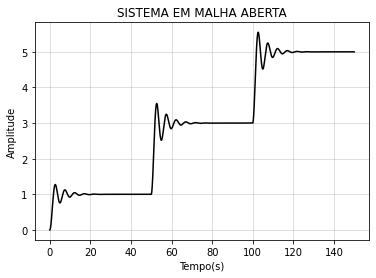

In [ ]:
##Sistema em malha aberta
plt.plot(t_o, y_o,'black')
plt.grid(alpha = 0.5)
plt.title('SISTEMA EM MALHA ABERTA')
plt.ylabel('Amplitude')
plt.xlabel('Tempo(s)')
plt.show()

In [ ]:
##Polos do sistema em Malha aberta
print('POLOS DO SISTEMA EM  MALHA ABERTA:')
print(eigvals(A))

POLOS DO SISTEMA EM  MALHA ABERTA:
[-0.56984029+0.j         -0.21507985+1.30714128j -0.21507985-1.30714128j]


----------
#Matriz A em malha fechada
----------

In [ ]:
P = [-50,-1+0.1j, -1-0.1j] ## Polos desejados para o sistema
K = matlab.place(A,B,P) ##Matriz de ganho para de chegar nos polos desejados

print('MATRIZ DE GANHO PARA OS POLOS DESEJADOS:')
print(K)

MATRIZ DE GANHO PARA OS POLOS DESEJADOS:
[[-1.49 51.   49.5 ]]


In [ ]:
Acl = (A - (np.dot(B,K))) ##Acl = (A - Bk)

print('MATRIZ A EM MALHA FECHADA:')
print(Acl)

MATRIZ A EM MALHA FECHADA:
[[ -1.     1.     0.  ]
 [  0.49 -51.   -50.5 ]
 [  0.     1.     0.  ]]


In [ ]:
##Polos do sistema em Malha Fechada
print('POLOS DO SISTEMA EM  MALHA FECHADA:')
print(eigvals(Acl))

POLOS DO SISTEMA EM  MALHA FECHADA:
[-50.+0.j   -1.+0.1j  -1.-0.1j]


In [ ]:
sys_close = matlab.ss(Acl,B,C,D) ##Sistema com os polos realocados A = (A - B*k)

In [ ]:
y_c, t_c, x_c = matlab.lsim(sys_close, u, tempo) ##Resposta do sistema ao degrau em malha fechada com os polos realocados

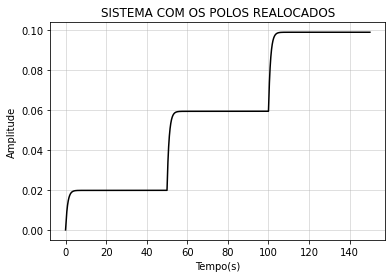

In [ ]:
##Resposta - Sistema em malha fechada - Polos realocados
plt.plot(t_c, y_c,'black')
plt.grid(alpha = 0.5)
plt.title('SISTEMA COM OS POLOS REALOCADOS')
plt.ylabel('Amplitude')
plt.xlabel('Tempo(s)')
plt.show()

--------
#Matriz B em malha fechada
-------

In [ ]:
Kdc = matlab.dcgain(sys_close) ##Ganho do sistema
Kp = 1/Kdc ##calculo do coeficiente de erro

print('VALOR DO COEFICIENTE DE ERRO:')
print(Kp)

VALOR DO COEFICIENTE DE ERRO:
50.49999999999999


In [ ]:
Bcl = np.dot(Kp,B) ## B = (B*kp)
print('MATRIZ B EM MALHA FECHADA:')
print(Bcl)

MATRIZ B EM MALHA FECHADA:
[[ 0. ]
 [50.5]
 [ 0. ]]


----------
#Sistema do servo-controlador em malha fechada
----------

In [ ]:
sys_close_kp = matlab.ss(Acl,Bcl,C,D) ##Sistema em malha fechada

In [ ]:
y, t, x = matlab.lsim(sys_close_kp, u, tempo) ##Resposta do sistema ao degrau em malha fechada

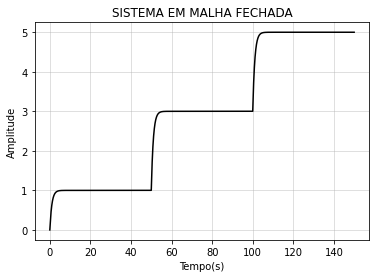

In [ ]:
##Resposta - Sistema em malha fechada - Polos realocados - Correção de erro
plt.plot(t, y,'black')
plt.grid(alpha = 0.5)
plt.title('SISTEMA EM MALHA FECHADA')
plt.ylabel('Amplitude')
plt.xlabel('Tempo(s)')
plt.show()

-------
#Critérios de desempenho
-------

In [ ]:
print('CRITÉRIOS DE DESEMPENHO PARA O SISTEMA EM MALHA FECHADA')
ctrl.step_info(sys_close_kp)

CRITÉRIOS DE DESEMPENHO PARA O SISTEMA EM MALHA FECHADA


{'Overshoot': 0,
 'Peak': 0.9992770477135836,
 'PeakTime': 6.907755278982139,
 'RiseTime': 2.1488339092555395,
 'SettlingMax': 1.0,
 'SettlingMin': 0.9001965192992976,
 'SettlingTime': 3.8198422834195513,
 'SteadyStateValue': 1.0,
 'Undershoot': 0}

In [ ]:
print('CRITÉRIOS DE DESEMPENHO PARA O SISTEMA EM MALHA ABERTA')
ctrl.step_info(sys_open)

CRITÉRIOS DE DESEMPENHO PARA O SISTEMA EM MALHA ABERTA


{'Overshoot': 27.412024245469247,
 'Peak': 1.2741202424546925,
 'PeakTime': 2.6449430397438554,
 'RiseTime': 1.133547017033081,
 'SettlingMax': 1.2741202424546925,
 'SettlingMin': 0.7591090829563235,
 'SettlingTime': 15.302884729946593,
 'SteadyStateValue': 1.0,
 'Undershoot': 0}